In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns


#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns
X = df.select_dtypes(include=['number']).drop(columns=["status_label"], errors="ignore")  # Exclude target column

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)



Variance Inflation Factor (VIF):
   Feature           VIF
0     year  1.084816e+00
1       X1  1.139660e+01
2       X2  1.958087e+14
3       X3  1.045889e+12
4       X4  3.900193e+09
5       X5  4.362706e+00
6       X6  3.098459e+00
7       X7  6.928806e+00
8       X8  6.767825e+00
9       X9           inf
10     X10  4.449185e+01
11     X11  1.670853e+01
12     X12  5.462219e+12
13     X13  3.532235e+13
14     X14  2.797125e+01
15     X15  2.966199e+00
16     X16           inf
17     X17  8.289702e+01
18     X18  2.649176e+14


In [5]:
df = df.drop('X16', axis=1)

# Convert X data into ratios relative to total assets

In [6]:
cols = df.columns.difference(["company_name", "status_label", "year"])

df[cols] = df[cols].div(df['X10'],axis=0)

df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X17,X18
0,C_1,alive,1999,0.689971,1.124304,0.024795,0.120150,0.453467,0.047454,0.173210,0.503040,1.382369,1.0,0.243519,0.095355,0.258065,0.221075,0.271291,0.541814,1.262219
1,C_1,alive,2000,0.692247,1.017036,0.026468,0.091710,0.456776,0.026403,0.164118,0.537317,1.245637,1.0,0.256445,0.065241,0.228600,0.178658,0.290751,0.515267,1.153927
2,C_1,alive,2001,0.614836,0.741309,0.031676,0.038309,0.403532,-0.082989,0.109164,0.513367,0.899355,1.0,0.306532,0.006633,0.158046,0.211862,0.196569,0.563172,0.861046
3,C_1,alive,2002,0.577337,0.723466,0.039574,0.044777,0.378599,-0.018074,0.096592,0.208746,0.883074,1.0,0.239809,0.005204,0.159608,0.296488,0.180749,0.570377,0.838297
4,C_1,alive,2003,0.609346,0.737781,0.037615,0.066955,0.348580,0.004940,0.147557,0.435515,0.919167,1.0,0.350583,0.029341,0.181387,0.185059,0.185938,0.574669,0.852212


Before SMOTE:
status_label
0    58784
1     4161
Name: count, dtype: int64

After SMOTE:
status_label
0    58784
1    58784
Name: count, dtype: int64


LogisticRegression(max_iter=1000)


Feature Coefficients:
   Feature  Coefficient
4       X5     1.304315
9      X10     0.219943
10     X11     0.011911
16     X18     0.011669
8       X9     0.010781
12     X13     0.005550
1       X2     0.004728
13     X14     0.004499
11     X12     0.003031
5       X6     0.002937
14     X15     0.000081
3       X4    -0.000894
7       X8    -0.002570
2       X3    -0.003414
15     X17    -0.008324
0       X1    -0.964180
6       X7    -1.036248

Model Accuracy: 0.5115333290970324
Precision: 0.08261964735516372
Recall: 0.619452313503305
F1 Score: 0.14579397710856762

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.50      0.66     14678
           1       0.08      0.62      0.15      1059

    accuracy                           0.51     15737
   macro avg       0.52      0.56      0.40     15737
weighted avg       0.89      0.51      0.62     15737



<Figure size 500x400 with 0 Axes>

<Axes: >

Text(0.5, 14.722222222222216, 'Predicted')

Text(33.22222222222222, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

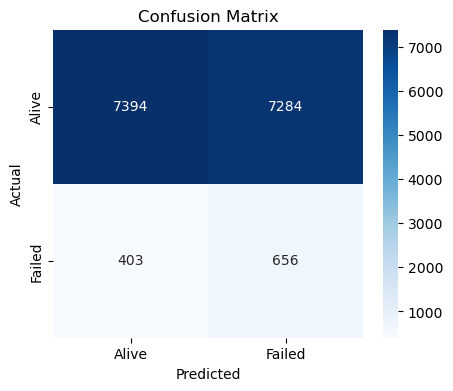

In [7]:
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Separate features and target variable
X = df.drop(columns=["status_label", "company_name", "year"])  # Features
y = df["status_label"]  # Target column

# Convert target labels to binary (0 = alive, 1 = failed)
y = y.map({'alive': 0, 'failed': 1})

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("Before SMOTE:")
print(y_train.value_counts())  # Check class distribution before SMOTE

# Apply SMOTE to training data only
smote = SMOTE(sampling_strategy='auto', random_state=99)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_sm.value_counts())  # Check class distribution after SMOTE

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased iterations to ensure convergence
logreg.fit(X_train_sm, y_train_sm)

# Get the coefficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:")
print(coef_df)

# Model Predictions
y_pred = logreg.predict(X_test)

# Model Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Alive", "Failed"], yticklabels=["Alive", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
